In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('D:/python/100 Excersizes pandas/Miniproject/sales_dataset/data/Sales_Dataset.csv')
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


In [11]:
df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City',
       'Year-Month'],
      dtype='object')

In [13]:
df.shape

(1194, 12)

In [15]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [20]:
print(set(df['Category']))

{'Office Supplies', 'Furniture', 'Electronics'}


In [22]:
df['Order ID'].nunique()

547

In [26]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


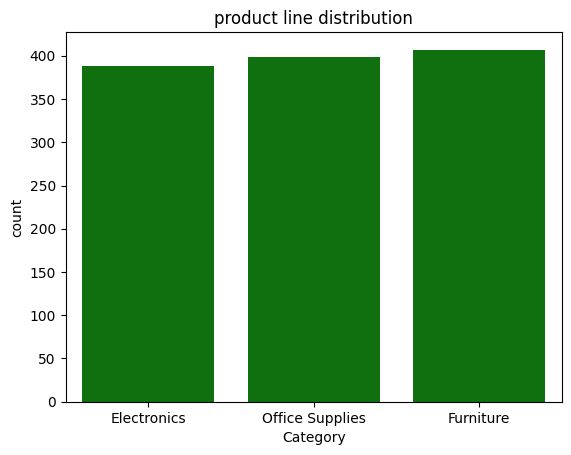

In [34]:
sns.countplot(x='Category',data=df, color='green')
plt.title('product line distribution')

plt.show()

<Axes: xlabel='Year-Month', ylabel='Amount'>

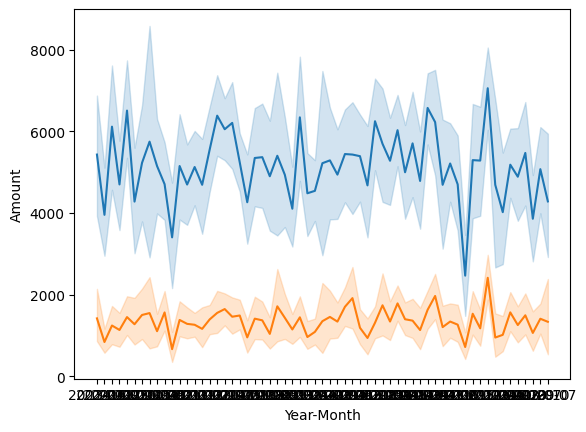

In [37]:
sns.lineplot(data=df,x='Year-Month',y='Amount')
sns.lineplot(data=df, x='Year-Month', y='Profit')

Text(0.5, 1.0, 'Total Amount and Profit by Category')

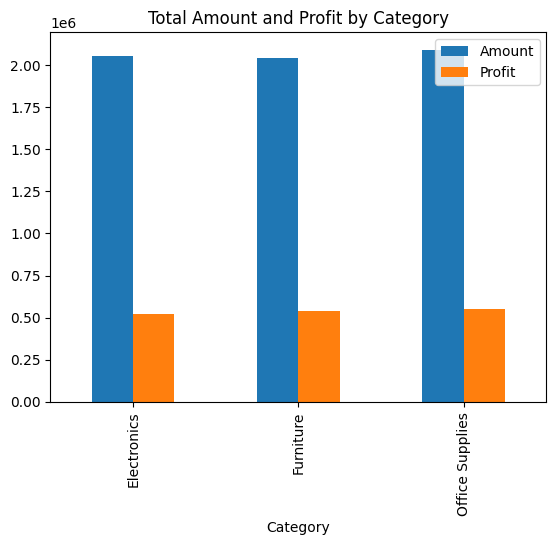

In [42]:
df.groupby('Category')[['Amount','Profit']].sum().plot(kind='bar')
plt.title('Total Amount and Profit by Category')

<Axes: ylabel='State'>

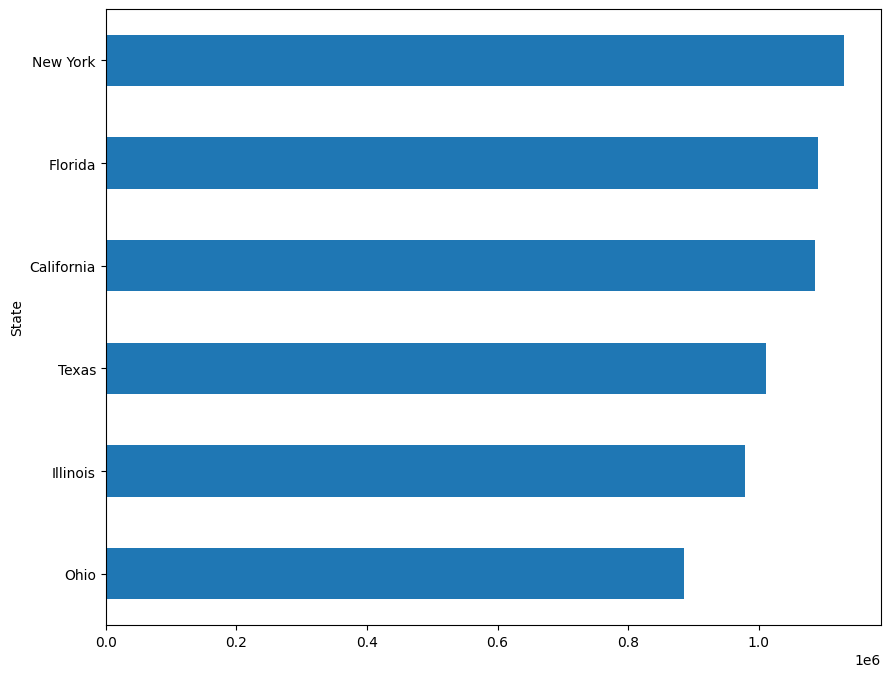

In [45]:
df.groupby('State')['Amount'].sum().sort_values(ascending=True).plot(kind='barh', figsize=(10,8))

In [46]:
df = df.drop(['Order ID', 'Order Date', 'CustomerName', 'Year-Month'], axis=1)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Amount        1194 non-null   int64 
 1   Profit        1194 non-null   int64 
 2   Quantity      1194 non-null   int64 
 3   Category      1194 non-null   object
 4   Sub-Category  1194 non-null   object
 5   PaymentMode   1194 non-null   object
 6   State         1194 non-null   object
 7   City          1194 non-null   object
dtypes: int64(3), object(5)
memory usage: 74.8+ KB


In [ ]:
cat_cols = df.select_dtypes(include = 'object').columns
num_cols = df.select_dtypes(include = 'int64').columns

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay

In [56]:
le=LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])
print(df[col])
    
    

0        9
1        2
2        1
3        9
4        2
        ..
1189    10
1190    13
1191     0
1192     1
1193     2
Name: City, Length: 1194, dtype: int64


In [57]:
X=df.drop('Category', axis=1)
y=le.fit_transform(df['Category'])
print(y)

[0 0 0 ... 0 0 2]


In [52]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [54]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: Logistic Regression
Accuracy: 37.24%

Model: Random Forest
Accuracy: 100.00%

Model: Decision Tree
Accuracy: 100.00%

Model: Naive Bayes
Accuracy: 48.54%

Model: SVM
Accuracy: 33.05%

Model: KNN
Accuracy: 46.44%


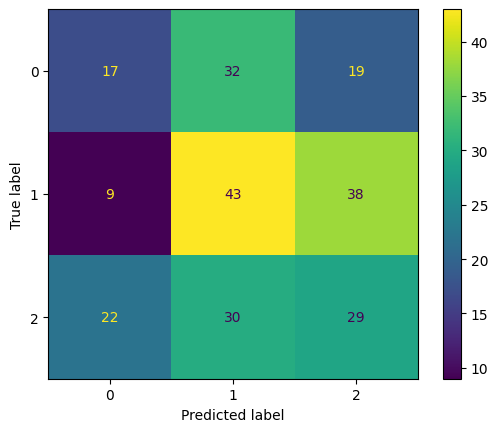

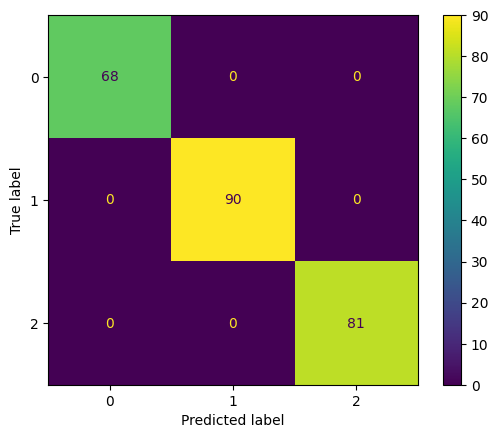

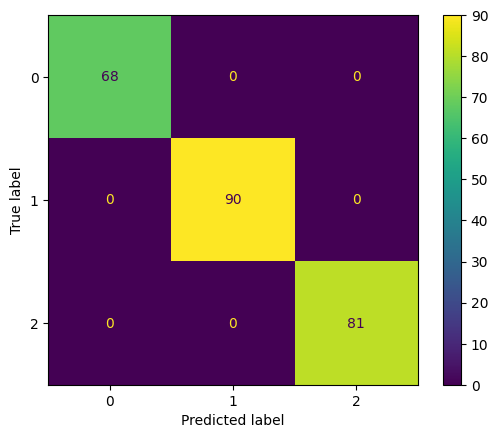

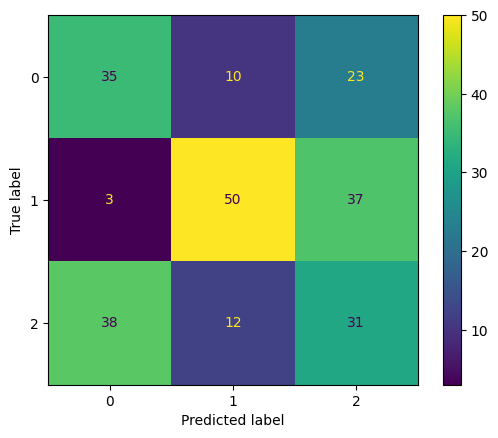

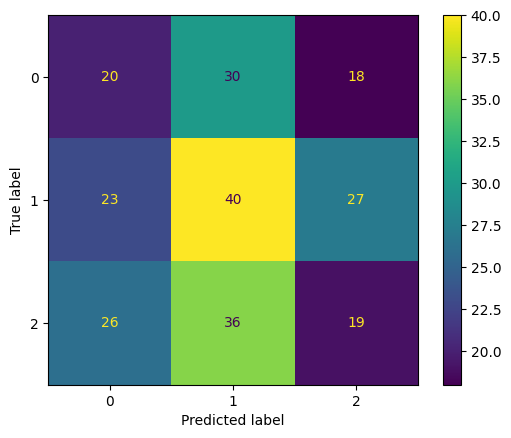

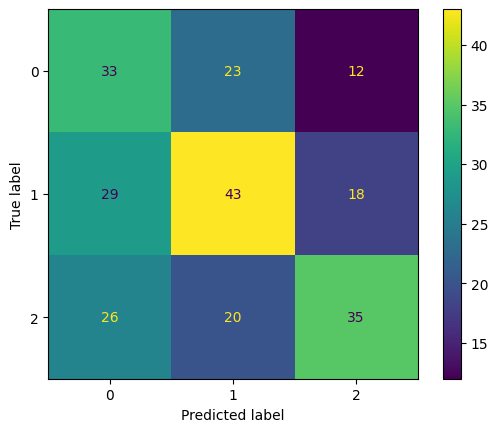

In [55]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds) * 100

    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.2f}%")
    
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

Cải thiện thêm các chỉ số F1-score, Recall,Precision


- Điều chỉnh siêu tham số (Hyperparameter tuning):
- Logistic Regression: C, penalty
- Random Forest: n_estimators, max_depth
- SVM: C, kernel, gamma
- KNN: n_neighbors
- Dùng GridSearchCV hoặc RandomizedSearchCV để tìm cấu hình tối ưu.


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

pipelines = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC())
    ]),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier())
    ]),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

for name, model in pipelines.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\nModel: {name}")
    print(classification_report(y_test, preds, digits=3))



Model: Logistic Regression
              precision    recall  f1-score   support

           0      0.341     0.221     0.268        68
           1      0.424     0.467     0.444        90
           2      0.365     0.432     0.395        81

    accuracy                          0.385       239
   macro avg      0.377     0.373     0.369       239
weighted avg      0.380     0.385     0.378       239


Model: SVM
              precision    recall  f1-score   support

           0      0.645     0.588     0.615        68
           1      0.837     0.856     0.846        90
           2      0.624     0.654     0.639        81

    accuracy                          0.711       239
   macro avg      0.702     0.699     0.700       239
weighted avg      0.710     0.711     0.710       239


Model: KNN
              precision    recall  f1-score   support

           0      0.438     0.676     0.532        68
           1      0.789     0.622     0.696        90
           2      0.762